In [1]:
import numpy as np
from itertools import chain
import IPython.display as ipd
import librosa, librosa.display
import math
import scipy
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [59]:
###################
## Pitch finding ##
###################
def cor(x, y):
    cov = np.sum([(i - np.mean(x))*(j - np.mean(y)) for i, j in zip(x, y)])
    sos = np.sqrt( np.sum([(i-np.mean(x)) ** 2 for i in x]) * np.sum([(j-np.mean(y)) ** 2 for j in y]) )
    return  cov/sos 

#Functional onset detector
def onset_detector(signal, sr, plot = True):
    x, sr = librosa.load(arquivo)
    onset_samples = librosa.onset.onset_detect(x, sr=sr, units='samples', hop_length=100, backtrack=False, pre_max=20, post_max=20, pre_avg=100, post_avg=100, delta=0.2, wait=0)                                 
    onset_boundaries = np.concatenate([[0], onset_samples, [len(x)]])
    if plot == True:
        onset_times = librosa.samples_to_time(onset_boundaries, sr=sr)
        librosa.display.waveplot(x, sr=sr)
        plt.vlines(onset_times, -1, 1, color='r')
        plt.show()
    return onset_boundaries

#Segmentation based on onsect function
def onset_segmentation(arquivo: str, plot_overall = True, plot_separate = True):
    x, sr = librosa.load(arquivo)
    onsets = onset_detector(x, sr, plot_overall)
    a = [0] + onsets.tolist()
    b = onsets.tolist() + [len(x)]
    segments = [x[i:j] for i, j in zip(a, b) if len(x[i:j])>0]
    duration = [len(i)/sr for i in segments]
    if plot_separate == True:
        [(librosa.display.waveplot(segment[i], sr=sr), plt.show()) for i in range(len(segments))]
    return segments, duration

def pitch_finding(signal, minimo = int(2.63), maximo = int(1348.50), sr = 22050):  
    autocor_array = librosa.autocorrelate(signal, max_size = 100)
    autocor_array[:minimo] = 0
    autocor_array[maximo:] = 0
    return sr/autocor_array.argmax()

def segment_to_pitch(arquivo): #onset is function to detect onset
    segments, duration = onset_segmentation(arquivo, plot_overall = False, plot_separate = False)
    freq = [pitch_finding(i) for i in segments]
    amplitude = [10 for i in range(len(segments))]
    return freq, duration, amplitude


In [60]:
######################
## Melody generator ##
######################

def pitch_gen(n): #n = number of semitones from A4
    if type(n) == int: return 440*pow(2, (n/12))
    return [440*pow(2, (i/12)) for i in n]

def nota(duracao = 1, frequency = 500, amplitude = 10, sr = 22050):
    sr = 22050 # sampling rate
    t = np.linspace(0, duracao, int(duracao*sr), endpoint=False) # time
    x = [amplitude*np.sin(2*np.pi*frequency*i) for i in t]
    return x
   
def melody(frequencias, duracoes, amplitudes): #sequence of melodies
    m = [nota(i, j, 10) for i, j in zip(duracoes, frequencias)]
    m = list(chain.from_iterable(m))
    return m

arquivo = 'C:/Users/Lenovo/Desktop/um.wav'
f, d, a = segment_to_pitch(arquivo)
m = melody(f, d, a)
ipd.Audio(m, rate=22050)


In [ ]:
#Original function designed to detect onset based on 
#shifts of signal variation

In [ ]:
def onset_frequency(signal, d, slide, hop = 2000):
    std = [ d(signal[i:i+hop]) for i in range(0, len(signal), slide)]
    position = [int(i+hop/2) for i in range(0, len(signal), slide)] #midpoint for each window
    peaks, __ = scipy.signal.find_peaks(std) #returns index of std where there is a peak
    return np.array(position)[np.array(peaks)]

In [39]:
import librosa
import numpy as np
y, sr = librosa.load("/home/pasoneto/Documents/github/Notebooks---various/s.wav")
x, sr = librosa.load("/home/pasoneto/Documents/github/Notebooks---various/a.wav")


In [19]:
def rmse(signal):
    return np.sum([ abs(i)**2  ])

In [22]:
np.sum([1, 2])

3

In [25]:
import librosa.display

In [40]:
onset = librosa.onset.onset_detect(y=y, sr=sr, units='time')
onset2 = librosa.onset.onset_detect(y=x, sr=sr, units='time')

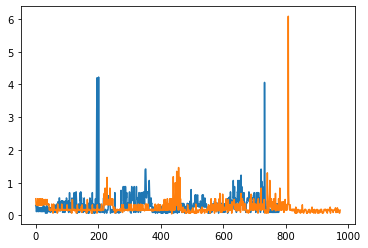

In [61]:
def ioi(onsets):
    deltas = []
    for i in range(1,len(onsets)):
        deltas.append(onsets[i]-onsets[i-1])
    return deltas
plt.plot(ioi(onset))
plt.plot(ioi(onset2))


In [72]:
def energy(signal, janela, pulo):
    return np.mean(np.array([sum(abs(signal[i:i+janela]**2)) for i in range(0, len(signal), pulo)]))
energy(x, int(22050/2), int(22050/4))



644.438349264762

In [74]:

hop_length = 256
frame_length = 512
librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length, center=True)

AttributeError: module 'librosa.feature' has no attribute 'rmse'